In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [6 0 9 1 1 5 7 6 8 7]


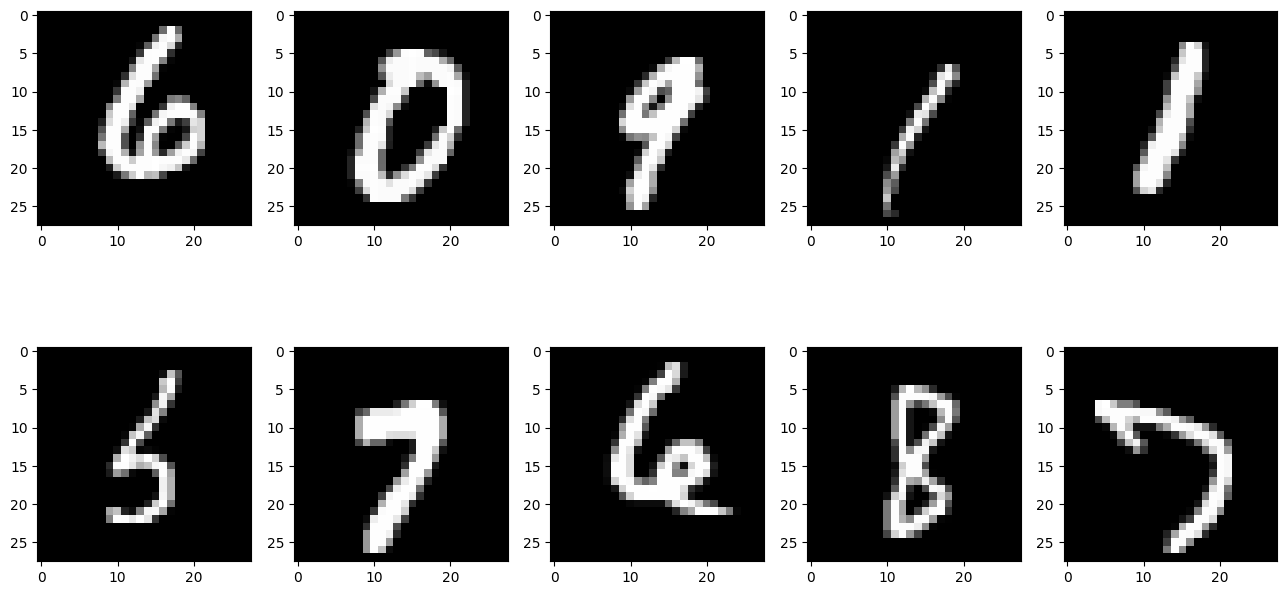

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
from tensorflow.keras.regularizers import l1, l2

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0251 - accuracy: 0.7883
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4084 - accuracy: 0.8388
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3764 - accuracy: 0.8441
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3553 - accuracy: 0.8478
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3466 - accuracy: 0.8491
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3393 - accuracy: 0.8526
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3352 - accuracy: 0.8541
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3331 - accuracy: 0.8546
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3284 - accuracy: 0.8565
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.325

Plot the loss and accuracy graphs

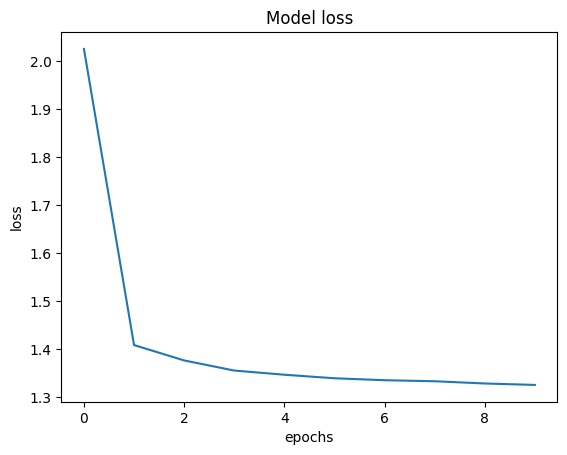

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

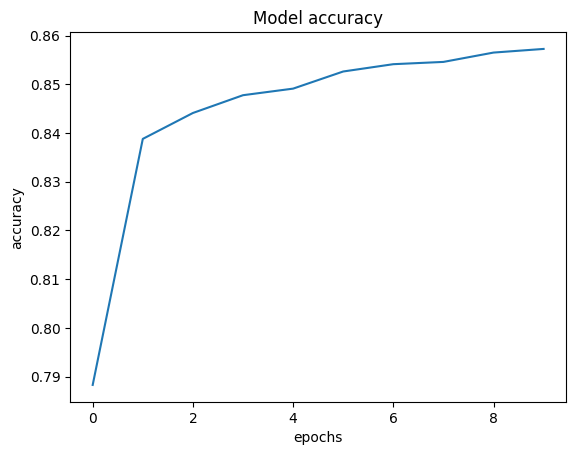

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 3ms/step - loss: 1.3098 - accuracy: 0.8602
Loss of the Test dataset is: 1.309804916381836
Accuracy of the test dataset is: 0.8601999878883362


313/313 [==============================] - 0s 1ms/step


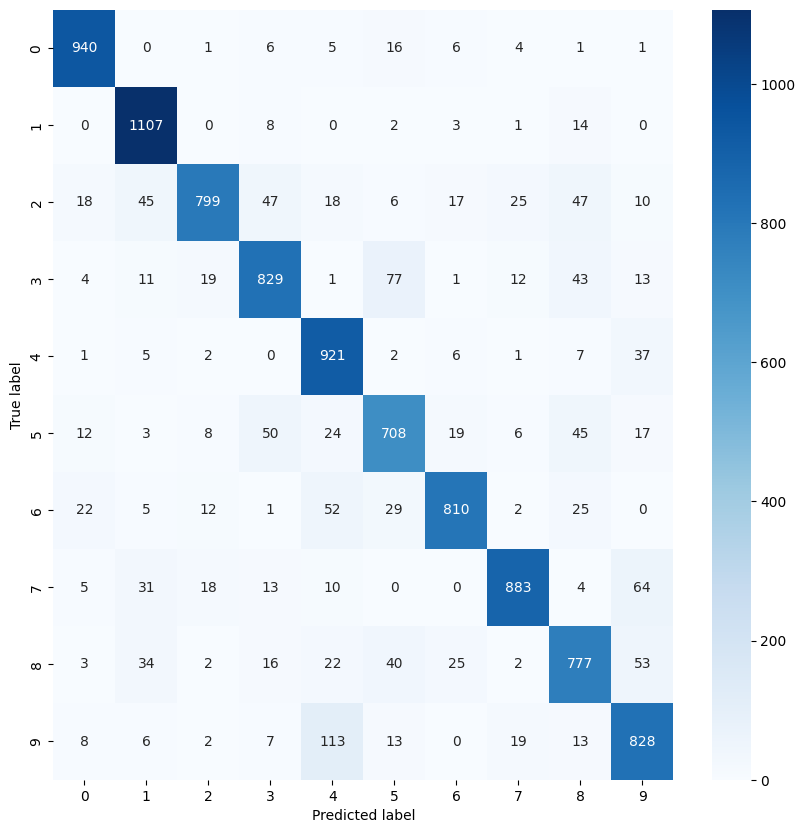

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes of the test data
y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_target, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')